# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

Hessenberg form of $H = U^T A U$ and $A_0 = Q R$ means that $A = U H U^T = Q R$\
for next QR-algorithm iteration: 
$A_1 = R Q = Q^T A Q = Q^T U H U^T Q = (U^T Q)^T H U^T Q = M^T H M$ where $M=U^T Q$ and $H$ is Hessenberg form, and so on for other QR iterrations.\
With the fact that the product of 2 orthogonal matrices is an orthogonal matrix (so $M$ is also orthogonal), the result of QR algorithm is a Hessenberg matrix if initial matrix is Hessenberg.
Those matrices ($Q$ and $U$) are orthogonal due to the fact that Givens rotations and Housholder reflections are orthogonal and their products are also orthogonal:
$(G_{n-1}..G_{1})^T(Hh_{n-1}..Hh_{1})^TA(Hh_{1}..Hh_{n-1})(G_{n-1}..G_{1})$ where $G_i$ - Givens rotation, $Hh_i$ - Householder reflection.


2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

**Theoretical proofs**

**1**

In [35]:
import torch
from torch import nn
import requests
from torchvision import utils as vutils
from torchvision import transforms
from tqdm import tqdm
from functorch import vmap, jacfwd, jacrev
from functorch.experimental import replace_all_batch_norm_modules_
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader as DL

from PIL import Image, ImageOps
from PIL.ImageFilter import GaussianBlur
from numpy.fft import fft2 as fft
from numpy.fft import ifft2 as ifft
from scipy.sparse.linalg import cg as conj_grad
from sklearn.datasets import make_sparse_spd_matrix, make_spd_matrix
import cvxpy as cvx
from cv2 import Sobel, Scharr
from scipy.linalg import toeplitz, circulant
from collections import deque
import cv2

import numpy as np
from scipy.linalg import hessenberg
from scipy.signal import convolve2d
import scipy
import matplotlib.pyplot as plt
import time
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
A = np.random.rand(5,5)
A

array([[0.457, 0.687, 0.893, 0.835, 0.039],
       [0.845, 0.22 , 0.49 , 0.513, 0.321],
       [0.992, 0.974, 0.218, 0.116, 0.95 ],
       [0.507, 0.89 , 0.912, 0.545, 0.71 ],
       [0.209, 0.416, 0.691, 0.206, 0.657]])

In [3]:
def Hessenberg_Transform(A):

  def household(H,i):
    x = H[i+1:,i]
    n = x.shape[0]
    e1 = np.zeros(n)
    e1[0] = -np.sign(x[0])*np.linalg.norm(x,2)
    v = e1 - x
    v = v[:, np.newaxis]
    Hi = np.identity(n) - 2*v @ v.T / (v.T @ v)
    return Hi

  H = A
  N = A.shape[0]
  U = np.identity(N)
  for i in range(N-2):
    Hbar = household(H,i)
    Hi = np.identity(N)
    Hi[i+1:,i+1:] = Hbar
    U = U @ Hi
    H = Hi @ H @ Hi.T
  return H, U

In [4]:
H, U = Hessenberg_Transform(A)
print(np.linalg.norm(U.T @ A @ U - H, np.Infinity))
U @ H @ U.T

3.5973743768404595e-16


array([[0.457, 0.687, 0.893, 0.835, 0.039],
       [0.845, 0.22 , 0.49 , 0.513, 0.321],
       [0.992, 0.974, 0.218, 0.116, 0.95 ],
       [0.507, 0.89 , 0.912, 0.545, 0.71 ],
       [0.209, 0.416, 0.691, 0.206, 0.657]])

In [5]:
U.T @ U

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -0., -0.,  0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0., -0., -0.,  1., -0.],
       [ 0.,  0., -0., -0.,  1.]])

In [6]:
np.linalg.norm(hessenberg(A) - H, np.Infinity)

3.4416913763379853e-15

In [7]:
Hess, U_hess = hessenberg(A,calc_q=True)
np.linalg.norm(U_hess.T @ A @ U_hess - Hess, np.Infinity)

1.3322676295501878e-15

In [8]:
def QR_givens(H):
  N = H.shape[0]
  R = H.copy()
  Q = np.identity(N)
  U = np.identity(N)
  for i in range(N-1):
    U = np.identity(N)
    x = np.array([R[i,i],R[i+1,i]])
    r = np.linalg.norm(x, 2)
    c = x[0] / r
    s = -x[1] / r
    G = np.array([[c, -s],
                  [s,  c]])
    U[i:i+2,i:i+2] = G
    Q = U @ Q
    R = U @ R

  return Q.T, R

In [9]:
Q, R = QR_givens(H)
print(np.linalg.norm(Q @ R - H, np.Infinity))
Q @ R

8.049116928532385e-16


array([[ 0.457, -1.342,  0.216, -0.18 , -0.295],
       [-1.414,  1.728, -0.57 , -0.649, -0.552],
       [-0.   , -1.158,  0.182,  0.04 ,  0.369],
       [ 0.   ,  0.   ,  0.114, -0.607, -0.108],
       [-0.   , -0.   ,  0.   ,  0.249,  0.337]])

In [10]:
Q1, R1 = np.linalg.qr(H)
print(np.linalg.norm(H - (Q1 @ R1), np.Infinity))
Q1 @ R1

8.881784197001252e-16


array([[ 0.457, -1.342,  0.216, -0.18 , -0.295],
       [-1.414,  1.728, -0.57 , -0.649, -0.552],
       [-0.   , -1.158,  0.182,  0.04 ,  0.369],
       [ 0.   ,  0.   ,  0.114, -0.607, -0.108],
       [-0.   , -0.   ,  0.   ,  0.249,  0.337]])

In [11]:
def QR_algorithm(A, N_iterations):
  H = A.copy()
  H, _ = Hessenberg_Transform(H)
  for _ in range(N_iterations):
    Q, R = QR_givens(H)
    H = R @ Q
  return H
  
def numpy_QR_algorithm(A, N_iterations):
  H = A.copy()
  H = hessenberg(H)
  for _ in range(N_iterations):
    Q, R = np.linalg.qr(H, mode='complete')
    H = R @ Q
  return H

In [12]:
A = np.array([[7, 2, 3, 1], 
              [2, 3, 5, 7],
              [1, 2, 1, 9],
              [5, 2 ,6, 1]])
iters = 50
Ans = QR_algorithm(A, iters)
Ans_numpy = numpy_QR_algorithm(A, iters)
eig_vals, eig_vectors = np.linalg.eig(A)
print('Eigen values')
print('My algo: ', np.sort(np.diag(Ans)))
print('Numpy algo: ', np.sort(np.diag(Ans_numpy)))
print('Numpy eigen: ', np.sort((np.linalg.eig(A)[0])))

Eigen values
My algo:  [-5.873  0.536  3.428 13.91 ]
Numpy algo:  [-5.873  0.536  3.428 13.91 ]
Numpy eigen:  [-5.873  0.536  3.428 13.91 ]


In [13]:
"""
If A has complex eigen vales (not real matrix) 
"""
A = np.random.normal(size=(5,5))
iters = 50
Ans = QR_algorithm(A, iters)
Ans_numpy = numpy_QR_algorithm(A, iters)
eig_vals, eig_vectors = np.linalg.eig(A)
print('Eigen values')
print('My algo: ', np.sort(np.diag(Ans)))
print('Numpy algo: ', np.sort(np.diag(Ans_numpy)))
print('Numpy eigen: ', np.sort((np.linalg.eig(A)[0])))

Eigen values
My algo:  [-2.345 -1.609  0.319  0.81   2.379]
Numpy algo:  [-2.345 -1.609  0.319  0.81   2.379]
Numpy eigen:  [-1.609+0.j    -1.022-1.901j -1.022+1.901j  0.81 +0.j     2.398+0.j   ]


Eigen values are diagonal elements of resulting matrix after QR algorithm. There are all the same for three methods. But when initial matrix $A$ is not real (some eigen values are complex), both QR algos compute only real part of eigen values, whereas numpy.linalg.eig give full complex form

In [14]:
"""
                DO NOT RUN THIS CELL, TAKES 5 MINUTES FOR COMPUTATIONS ON INTEL CORE i7 12-th Gen with 12 cores
"""
N = 200
comp_time = []
for i in range(1, N):
    A = np.random.rand(i,i)
    start_time = time.time()
    Ans = QR_algorithm(A, 50)
    comp_time.append(time.time() - start_time)
    

In [15]:
N = 200
comp_time_numpy = []
for i in range(1, N):
    A = np.random.rand(i,i)
    start_time = time.time()
    Ans = numpy_QR_algorithm(A, 50)
    comp_time_numpy.append(time.time() - start_time)

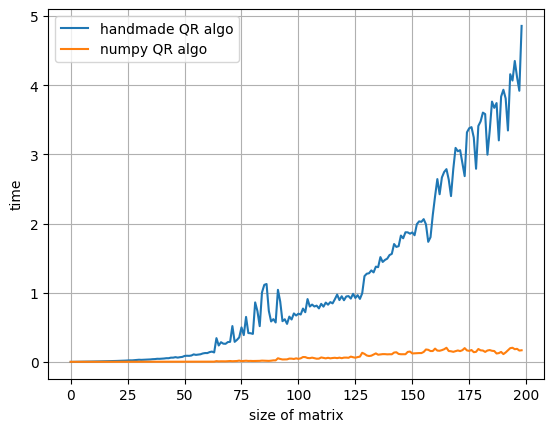

In [16]:
# plt.yscale('log')
# plt.xscale('log')
plt.grid(True)
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.plot(comp_time, label='handmade QR algo')
plt.plot(comp_time_numpy, label='numpy QR algo')
plt.legend()

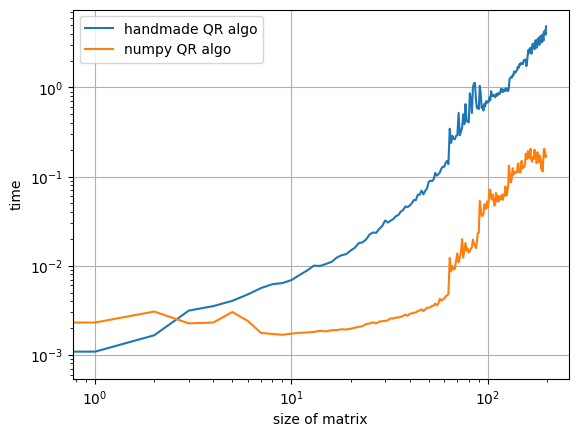

In [17]:
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.plot(comp_time, label='handmade QR algo')
plt.plot(comp_time_numpy, label='numpy QR algo')
plt.legend()

As we can see Givens-based hand-made QR algo works with quadratic dependence of matrix size, because each Givens rotation demands $O(n^2)$ operations. Probably, Numpy-based verstion  fristly converts Hessenberg matrix to  symmetric than to tridiagonal form (which does not change during QR iteration), thus, it demands $O(n)$ operations and linear time dependence as plot shows.




\
\

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

As [Expected value of vector and matrix product](http://www.cs.cmu.edu/~cga/dynopt/kendrick.pdf) paragraph tells: $\mathbb{E}[u^TBu] = \mu^TB\mu + tr(B\Sigma)$, where $B$ is [n,n] symmetric matrix and $\Sigma$ is a covariance matrix and the fact that $u^TBu$ is [1,1] matrix we can write:\
$\mathbb{E}[u^TBu] = \mathbb{E}[tr(u^TBu)] = \mathbb{E}[tr(Buu^T)]$ (beacuse $tr(ABC)=tr(BCA)$) $ = tr(B\mathbb{E}[uu^T])$ using the fact that $Cov(u,u) = \mathbb{E}[uu^T] - \mathbb{E}[u]\mathbb{E}[u^T]$ thus, $\mathbb{E}[uu^T] = Cov(u,u) + \mathbb{E}[u]\mathbb{E}[u^T]$ expected value of quadratic form becomes:\
$\mathbb{E}[u^TBu] = tr(B[Cov(u,u) + \mathbb{E}[u]\mathbb{E}[u^T]]) = tr(B[\Sigma+\mu_1 \mu_1^T]) = tr(B\Sigma + \mu_1^T B \mu_1) = tr(B\Sigma) + \mu_1^T B \mu_1 $ in our case:\
$\mathbb{E}[u^TBu] = tr(\sigma^2 I B) + \mu_1^TB\mu_1 = \sigma^2 tr(B)$\
 as $\Sigma = \sigma^2 I = \sigma^2$ [1,1] matrix and $\mu_1 = \mathbb{E}[u] = 0$

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

By definition:
$Var(u^T B u) = \mathbb{E}[(u^TBu -\mathbb{E}[u^TBu])^2] = \mathbb{E}[(u^TBu)^2] - \mathbb{E}^2[u^TBu] $ where $\mathbb{E}^2[u^TBu] = \sigma^4 tr^2(B)$ (for our case) and\
$\mathbb{E}[(u^TBu)^2] = \sum\sum\sum\sum \limits_{i,j,k,l=1..n} (B_{i,j}B_{k,l}u_i u_j u_k u_l) = \Bigg \{
\begin{aligned}
    &\mu_2^2, \text{ } if\text{ }i=j\neq k=l, \text{ } or \text{ } \text{ }i=k\neq j=l \text{, } or \text{ } \text{ }i=l\neq j=k\\
    & \mu_4, \text{ } if\text{ }i=j=k=l\\
      &0, otherwise
\end{aligned} \Bigg \}$ where $\mu_2 = \mathbb{E}[u^2], \text{ } \mu_4=\mathbb{E}[u^4]$ and $\mu^k$ -central moment of $k$-order thus:\
$\mathbb{E}[(u^TBu)^2] = \mu_4 \sum{B^2_{ii}} + \mu_2^2 \sum \sum_{i=j\neq k=l}{B_{ij} B_{kl}} + \mu_2^2 \sum \sum_{i=l\neq j=k} {B_{ij}B_{kl}} + \mu_2^2 \sum \sum_{i=k \neq j=l} {B_{ij}B_{kl}}  = \mu_4 \sum{B_{ii}^2} + \mu_2^2 \Bigg [ \sum \sum_{i=j\neq k=l}{B_{ij} B_{kl}} + \sum \sum_{i=l\neq j=k} {B_{ij}B_{kl}} + \sum \sum_{i=k \neq j=l} {B_{ij}B_{kl}} \Bigg ] $\
where double sums are:

$\sum \sum_{i=j\neq k=l}{B_{ij} B_{kl}} = tr^2(B) - tr(B^2)\text{ }$, as  $\text{ }tr^2(B)=tr(B)tr(B) = tr(B^2) + \sum \sum_{i=j\neq k=l}{B_{ij} B_{kl}}\text{ }$, as $\text{ } (a+b+c)^2 = a^2+b^2+c^2+(ab + ac + bc + ba+ ca + cb)$

$\sum \sum_{i=l\neq j=k} {B_{ij}B_{kl}} = \sum \sum_{i=k \neq j=l} {B_{ij}B_{kl}} \text{ as B - symmetric} = \sum\sum{B_{ij}B_{ji}} - \sum{B^2_{ii}} = \sum{(B^TB)_{ii}} - \sum{B_{ii}^2} = tr(B^TB) - \sum{B_{ii}^2} = tr(B^TB) - tr(B^2)$ as for symmetric $B$: $\sum\sum{B_{ij}^2} = tr(B^TB)$

 $\mu_4 \sum{B_{ii}^2} + \mu_2^2 \Bigg [ \sum \sum_{i=j\neq k=l}{B_{ij} B_{kl}} + 2 \sum \sum_{i=l\neq j=k} {B_{ij}B_{kl}} \Bigg ] = \mu_4 tr(B^2) + \mu_2^2 \Bigg [ tr^2(B) - tr(B^2) + 2tr(B^TB) - 2tr(B^2) \Bigg ] = \mu_4 tr(B^2) + \mu_2^2 \Bigg [ tr^2(B) - 3tr(B^2) + 2tr(B^TB)\Bigg ] =\mu_4 tr(B^2) + \mu_2^2 tr^2(B) - 3\mu_2^2 tr(B^2) + \mu_2^2 2tr(B^TB)= (\mu_4 - 3\mu_2^2)tr(B^2) + \mu_2^2[tr^2(B) + 2tr(B^TB)]$\
 Finally, $\mathbb{E}[(u^TBu)^2] = (\mu_4 - 3\mu_2^2)tr(B^2) + \mu_2^2[tr^2(B) + 2tr(B^TB)]$
 
Finally,\
 $Var(u^T B u) = \mathbb{E}[(u^TBu)^2] - \mathbb{E}[u^TBu]^2 = (\mu_4 - 3\mu_2^2)tr(B^2) + \mu_2^2[tr^2(B) + 2tr(B^TB)] - (tr(\sigma^2I B) + \mu_{1}^TB \mu_{1})^2 =  (\mu_4 - 3\mu_2^2)tr(B^2) + \mu_2^2[tr^2(B) + 2tr(B^TB)] - tr^2(\Sigma B) -2tr(\Sigma B)\mu_{1}^TB \mu_{1} - \mu_{1}^TB \mu_{1}\mu_{1}^TB \mu_{1}  = (\mu_4 - 3\mu_2^2)tr(B^2) + \mu_2^2tr^2(B) + 2\mu_2^2tr(B^TB) - \mu_2^2tr^2(B) = (\mu_4 - 3\mu_2^2)tr(B^2) + 2\mu_2^2tr(B^TB)$ where $\mu_2 = \sigma^2$ and $\mu_4 = 3\sigma^4$, and $\mu_1 = \mathbb{E}[u] = 0$

 In fact this is the same as\
 $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2 = 2\mu_2^2 (\sum_{i, j}B_{ij}^2 - \sum_{i=j}B_{ij}^2) + \mu_4 tr(B^2) - \mu_2^2 tr(B^2) = 2\mu_2^2tr(B^T B) - 2\mu_2^2tr(B^2) - \mu_2^2tr(B^2) + \mu_4tr(B^2) = (\mu_4 - 3\mu_2^2)tr(B^2) + 2\mu_2^2tr(B^T B)$
 

<!-- If we have a quadratic form of $Q(u) = u^T B u + b^Tu + c$ and $u \sim Distr(\mu = 0, \sigma^2)$ and $B = B^T$ then $\mathbb{E}[Q(u) = \mathbb{E}[u^T B u] + \mathbb{E}[b^Tu] + \mathbb{E}[c]] = \sigma^2 tr(B) + \mu ^T B \mu + b^T\mu + c = \sigma^2 tr(B) + c$\
By definition $Var(Q(u)) = \mathbb{E}[(Q(u) - \mathbb{E}[Q(u)])(Q(u) - \mathbb{E}[Q(u)])^T] = \mathbb{E} [(u^T B u + b^Tu + c - \mathbb{E}[Q(u)])(u^T B u + b^Tu + c - \mathbb{E}[Q(u)])^T] $\
let $ \tilde{c} = c - \mathbb{E}[Q(u)]$ then $Var(Q(u)) = \mathbb{E} [(u^T B u + b^Tu + \tilde{c})(u^T B u + b^Tu + \tilde{c})^T] = \mathbb{E} [ u^T B u u^T B u + 2b^Tuu^TBu + 2\tilde{c}u^T B u + u^Tbb^Tu + 2\tilde{c}b^Tu + \tilde{c}^2] = \mathbb{E}[u^T B u u^T B u] + \mathbb{E}[2b^Tuu^TBu] + \mathbb{E}[2\tilde{c}u^T B u] + \mathbb{E}[u^Tbb^Tu] + \mathbb{E}[2\tilde{c}b^Tu] + \mathbb{E}[\tilde{c}^2]$\
in our case $\Sigma = \sigma^2$ - $[1,1]$ matrix and $\mu = 0$, and $B=B^T$, and $\mathbb{E}[Q(u)=u^T B u] = \sigma^2tr(B)$ thus:\
$Var(u^T B u) = \mathbb{E}[u^T B u u^T B u] + \mathbb{E}[2\tilde{c}u^T B u] + \mathbb{E}[\tilde{c}^2] = \mathbb{E}[u^T B u u^T B u] + 2\tilde{c} \mathbb{E}[u^T B u] + \tilde{c}^2 = 2\sigma^4tr(B^2) + 2(0 -\sigma^2tr(B)) 
\sigma^2tr(B) + (\sigma^2tr(B))^2 = 2\sigma^4tr(B^2) - \sigma^4tr^2(B) = \sigma^4 (2tr(B^2)-tr^2(B))$\
using the fact that $tr^2(B) = tr(B^2)+2\sum\limits_{i<j}^{n}{\lambda_{ij}}$ where $\sum\limits_{i<j}^{n}{\lambda_{ij}}$ - [elementary symmetric polynomial](https://en.wikipedia.org/wiki/Elementary_symmetric_polynomial) and $\lambda_{ij}$ - eigen values of $B$\
 the final formula is: $Var(u^T B u) = \sigma^4 (2tr(B^2)-tr^2(B)) = \sigma^4 (2tr(B^2)- tr(B^2) - 2\sum\limits_{i<j}^{n}{\lambda_{ij}}) = \sigma^4 (tr(B^2) - 2\sum\limits_{i<j}^{n}{\lambda_{ij}}) = \sigma^4tr(B^2) - 2\sigma^4\sum\limits_{i<j}^{n}{\lambda_{ij}} = \sigma^4 \sum \limits_{i=1}^{n} B_{ii}^2 - 2\sigma^4\sum\limits_{i<j}^{n}{\lambda_{ij}}$ -->

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;
    
  For our case $Var(u^TBu) = \mathbb{E}[(u^TBu)^2] - \mathbb{E}[u^TBu]^2 = (\mu_4 - 3\mu_2^2)tr(B^2) + 2\mu_2^2tr(B^T B) = 3\sigma^4 tr^2(B) + 2\sigma^4 tr(B^TB) - 3\sigma^4tr^2(B) = 2\sigma^4 tr(B^TB)$ where $\mu_2 = \sigma^2$ and $\mu_4 = 3\sigma^4$ for $\mathcal{N}(0, \sigma^2)$

In [18]:
def sprandsym(n):
    result = make_sparse_spd_matrix(dim=n, random_state=0)
    return result

In [19]:
B = make_spd_matrix(10)
samples = []
for i in range(100000):
    u = np.random.normal(size=10)
    samples.append(u @ B @ u)
print('For some random matrix B and Normally distributed random vector:')
print(np.var(np.array(samples)))
print(2*np.trace(B @ B))

N = 10
B = sprandsym(N)

samples = []
for i in range(100000):
    u = np.random.normal(size=10)
    samples.append(u @ B @ u)
print('\n')
print('For some Sparce random matrix B:')
print(np.var(np.array(samples)))
print(2*np.trace(B @ B))

For some random matrix B and Normally distributed random vector:
217.47317983119206
219.77641825315504


For some Sparce random matrix B:
33.1463709878422
33.067812624067834


b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

  Rademacher distribution can be treated as a case of Bernulli distribution. If $Y$ is a Bernulli(p) random variable, $X = 2Y -1$ is a Rademacher(p) random variable, thus:\
  $ P(X=x) = \Bigg \{
  \begin{aligned}
      & p, x= 1\\
      & 1-p, x=-1
  \end{aligned} \Bigg \}$ and $\mathbb{E}[X] = \sum {x p(X=x) = −1(1 − p) + 1p = 2p − 1}$ and $\mathbb{E}[X^2] = \mu_2 = 1$, and $\mathbb{E}[X^4]=\mathbb{E}[X^2]\mathbb{E}[X^2] = \mu_4 = 1$, and all other moments are zero

  $Var(u^TBu) =  (\mu_4 - 3\mu_2^2)tr(B^2) + 2\mu_2^2tr(B^T B) = 2tr(B^TB) -2 tr(B^2) = 2 (tr(B^TB) - tr(B^2))$

In [20]:
"""
Lets compute some variances
"""
B = make_spd_matrix(10)
samples = []
for i in range(100000):
    u = np.random.randint(low=0, high=2, size = 10) # 0-mean and 1-variance
    u[u == 0] = -1
    samples.append(u @ B @ u)
    
print('For Rademacher distributed random vector and random SPD B')
print(np.var(np.array(samples)))
print(2*(np.linalg.norm(B, 'fro')**2 - np.trace(B**2)))
print(2*(np.trace(B@B) - np.trace(B**2)))

B = circulant(np.random.rand(10))
B = B.T @ B

samples = []
for i in range(100000):
    u = np.random.randint(low=0, high=2, size = 10) # 0-mean and 1-variance
    u[u == 0] = -1
    samples.append(u @ B @ u)

print('\n')
print('For Rademacher distributed random vector and random Circulant B:')
print(np.var(np.array(samples)))
print(2*(np.trace(B@B) - np.trace(B**2)))

For Rademacher distributed random vector and random SPD B
153.68276186142126
152.33077381766248
152.33077381766242


For Rademacher distributed random vector and random Circulant B:
2143.5219630056386
2102.346660400023


4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  By definition of a unweighted sample mean: $\mathbb{E}[\hat{\mu}] = \mathbb{E} [\frac{1}{N}(\hat{\mu}_1 + \hat{\mu}_2 + ... + \hat{\mu}_N)] = \frac{1}{N} (\mathbb{E}[\hat{\mu}_1] + \mathbb{E}[\hat{\mu}_2] +...+ \mathbb{E}[\hat{\mu}_N]) = \frac{1}{N} \sum_{1..N} {\mu} = \mu$

  Similar technique for $Var(\hat{\mu}) = Var(\frac{1}{N} (\hat{\mu_1} + ... + \hat{\mu_N})) = \frac{1}{N^2}Var_1 (\hat{\mu_1}) + ... + \frac{1}{N^2}Var_N (\hat{\mu_N}) = \frac{1}{N^2} (N\sigma^2) = \frac{\sigma^2}{N}$

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

  Adapting to our case we can rewrite Chebyshev inequality as follows: $Pr( |\hat{\mu} - \mu | \leq  \epsilon) \geq 1-\delta$, where $\frac{k \sigma}{\sqrt{N}}= \epsilon$ and  $\frac{1}{k^2}=\delta$,  thus:\
  $k = \frac{1}{\sqrt{\delta}}$ and $N = \frac{\sigma^2}{\delta \epsilon^2}$

5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  $Pr(\frac{|T - tr(A)|}{tr(A)} \leq \epsilon) \geq 1 - \delta = Pr(|T - tr(A)| \leq \epsilon tr(A)) \geq 1 - \delta$ where $T$ -estimation of $tr(A)$\
  thus, $\epsilon = \frac{k \sigma }{\sqrt{N}tr(A)}$ and $k = \frac{1}{\sqrt(\delta)}$ which gives: $N = \frac{\sigma^2}{\epsilon^2 \delta tr(A)}$

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.
  
    Done above in 3.a and 3.b with experiments

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

    Done below with experiments

**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions:
  
  
    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

In [21]:
def Hutchinson(B, iters, dist='Normal'):
    def sample_vec_from_dist(dist, size):
        vec = 0
        if dist == 'Normal':
            vec = np.random.normal(size = size) # 0-mean and 1-variance

        elif dist ==  'Rademacher':
            vec = np.random.randint(low=0, high=2, size = size) # 0-mean and 1-variance
            vec[vec == 0] = -1
        else:
            raise ValueError
        return vec 

    trace_estimate = 0
    N = B.shape[0]
    for _ in range(iters):
        u = sample_vec_from_dist(dist, N)
        trace_estimate += u @ (B @ u)
    
    return trace_estimate / iters


2. Evaluate your algorithm on several matrices on your choice.

In [22]:
"""
let eps = 0.1 and probability of residual should be less then eps is higher then 1 - delta = 0.99. 
Lets create sparce matrix with random elements
"""

eps = 0.1
delta = 0.01
sigma = 1
N = 10
B = sprandsym(N)
iters = sigma**2 / (eps**2 * delta * np.trace(B))
iters = int(np.abs(np.ceil(iters)))
print(B)
trace_estimate = Hutchinson(B, iters, dist='Normal')
print('iters = ', iters)
print('trace estimate with Gaussian: ', trace_estimate)
print('real trace:', np.trace(B))
print('error: ', np.abs(trace_estimate - np.trace(B))/np.abs(np.trace(B)))

[[ 1.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     1.474  0.     0.     0.     0.206 -0.688  0.     0.   ]
 [ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.    -0.87  -0.316  0.     0.   ]
 [ 0.     0.     0.206  0.     0.    -0.87   1.846 -0.024  0.     0.   ]
 [ 0.     0.    -0.688  0.     0.    -0.316 -0.024  1.1    0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]]
iters =  876
trace estimate with Gaussian:  11.618116398326222
real trace: 11.419286655684129
error:  0.017411748092261342


In [23]:
B = circulant(np.random.rand(10))
B = B.T @ B
trace_estimate = Hutchinson(B, iters, dist='Normal')
print('trace estimate with Gaussian: ', trace_estimate)
print('real trace:', np.trace(B))
print('error: ', np.abs(trace_estimate - np.trace(B))/np.abs(np.trace(B)))

trace estimate with Gaussian:  35.095081989017736
real trace: 35.66545195031269
error:  0.015992225812519308


In [24]:
trace_estimate = Hutchinson(B, iters, dist='Rademacher')
print('trace estimate with Rademacher: ', trace_estimate)
print('real trace:', np.trace(B))
print('error: ', np.abs(trace_estimate - np.trace(B))/np.abs(np.trace(B)))

trace estimate with Rademacher:  36.26158699897598
real trace: 35.66545195031269
error:  0.016714636043131895


Remember that $N = \frac{\sigma^2}{\delta \epsilon^2 tr(A)}$
let $\delta = 0.01$ and $\epsilon = 0.1$ than $N \approx 5000$
This amount of iters is enough to obtain relatively small error with high probability, sampling from both Rademacher and Gaussian distributions. The larger the variance of distributions the more iterations needed to fullfil the boundary condition

**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

<!-- $u^T A u = [u_1, u_2, ..., u_N] \begin{bmatrix}
                                    1 & 1 & ... & 1 \\
                                    1 & 1 & ... & 1 \\
                                    \vdots &  \\
                                    1 & 1 & ... & 1
                                \end{bmatrix}   [u_1, u_2, ..., u_N]^T  = [\sum_{1..N}{u_i}, \sum_{1..N}{u_i}, ..., \sum_{1..N}{u_i}] \begin{bmatrix}
                                                                                                                                            u_1  \\
                                                                                                                                            u_2  \\
                                                                                                                                            \vdots \\
                                                                                                                                            u_N  
                                                                                                                                      \end{bmatrix}
(u_1 \sum_{1..N}{u_i} + u_2 \sum_{1..N}{u_i} + u_N \sum_{1..N}{u_i}) = \sum_{1..N}{u_i} \sum_{1..N}{u_i} = (\sum_{1..N}{u_i})^2$

thus, $\frac{u^T A u}{N} = \frac{(\sum_{1..N}{u_i})^2}{N} = \frac{\sum_{1..N}{u_i}^2}{N} + \frac{\sum_{i\neq j}{u_i u_j}}{N} = \sum_{1..N}{\frac{u_i^2}{N}} + \sum_{i\neq j}{\frac{u_i u_j}{N}}$

Lets write moment generation function: $M_w(t) = \mathbb{E} [e^{wt}] = \mathbb{E} [e^{(\frac{1}{N}\sum_{1..N}{u_i}^2 + \frac{1}{N}\sum_{i\neq j}{u_i u_j})t}] = \mathbb{E}[e^{\frac{1}{N}\sum_{1..N}{u_i}^2t}  e^{\frac{1}{N}\sum_{i\neq j}{u_i u_j}t}] = \mathbb{E} [e^{\sum_{1..N}{u_i}^2 t}] + \mathbb{E} [e^{\sum_{i\neq j}{u_i u_j} t}] = \mathbb{E} [e^{u_1^2t + u_2^2t ... u_N^2t}] = \mathbb{E} [e^{u_1^2t}] \mathbb{E} [e^{u_2^2t}], ..., \mathbb{E} [e^{u^2_{n} t}]$

it can be shown that $\mathbb{E} [e^{u_1^2t}] = \mathbb{E} [e^{u_N^2t}] = \frac{1}{(1-2t)^{1/2}}$, thus $M_w(t) = \frac{1}{(1-2t)^{N/2}}$ -->

Using spectral theorem and the fact that $A$ is symmetric and positive-definite:

$\frac{1}{N} u^T A u = \frac{1}{N} u^T Q \Lambda Q^T u = \frac{1}{N} (Q^Tu)^T \Lambda (Q^T u) = \frac{1}{N} \sum_{i=1..N}{\lambda(q_i u)^2} = \frac{1}{N} \sum_{i=1..N}{\lambda_i x_i^2} \sim \sum_{1..N}{\frac{\lambda_i}{N} \chi^2_1}$ so, it`s a weighted sum of $\chi^2_1$ distributions which is also a $\chi^2_1$ distribution with weights of eigen values of $A$ with 1 degree of freedom. In our case non-zero eigen value equals N, so $\sum_{1..N}{\frac{\lambda_i}{N} \chi^2_1} \sim \sum{\chi^2_1} \sim \chi^2_1$ 

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

Using the notations from previous proof, the problem can be rewritten again as a sum of sums of $\chi^2_1$:

$\sum_{1..M}{\frac{1}{N} u^T_i A u_i} = \sum_{j=1..M}\frac{1}{N}\sum_{i=1..N}{\Lambda_{ji}Q_{ji}U_{ji}} = \frac{1}{N} \sum_{1..M}{N\chi^2} = \sum{\chi^2} \sim \chi^2_M$

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

if we take this bound, which has been proved in [Hutch++](https://arxiv.org/pdf/2010.09649.pdf) (Appendix A)
$\begin{equation} \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta. \end{equation}$

and set $l = \frac{\log{1/\delta}}{\epsilon^2} $ then with probability $\geq 1 - \delta$, $|G_M - tr(A)| \leq \epsilon ||A||_F$ and further in Subproblem 4.3 we will show that for any SPD A: $\left\|A\right\|_{F} \leq \text{tr}(A)$, thus:\
$\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---



2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

$\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} = ||A - A_k||_F$, where $A_k$ - low-rank approximation of $A$,

$||A - A_k||_F^2 = \sum_{i=k+1 .. d}{\lambda_i^2} \leq \lambda_{k+1} \sum_{i=k+1 .. d}{\lambda_i} \leq \frac{1}{k} tr(A)\sum_{i=k+1 .. d}{\lambda_i} \leq \frac{1}{k} tr(A)^2$,   thus\
$||A - A_k||_F = \left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}} tr(A)$ 

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

    Since A is symmetric and positive definite, there exists eigen decomposition $A = U \Lambda U^T$\
$tr(A) = tr(A^T) = \sum{e_i^T A^T e_i} = \sum{e_i^T U^T \Lambda U e_i} = \sum\sum{u^T_{ij}\lambda_i u_{ij}} = \sum{\lambda_j}\sum{u_{ij}^2} = \sum{\lambda_i} = \sum{||\sigma_i||}$ with the fact that $u^Tu=1$, and $\sigma_i$ - singular value.

    Using SVD $||A||_F = \sqrt{tr(A^TA)} = \sqrt{tr(V\Sigma U^T U\Sigma V^T)} = \sqrt{tr(V\Sigma^2 V^T)} = \sqrt{\sum{\sigma_i^2}}$ 

    Now we can compare $\sqrt{\sum{\sigma_i^2}} \leq \sum{||\sigma_i||}$, which leads to:\
$\sum{\sigma_i^2} \leq (\sum{||\sigma_i||})^2$ which evidently holds true 

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [25]:
def improved_Hutch(A, m, sigma=1, eps=0.05, C=1, delta=0.01):
    # l = 1/eps
    # m = ((1/delta)* sigma**2 * l ) / ( C**2 * np.log(1/delta) * np.linalg.norm(A, 'fro')**2)
    trace_estimate = 0
    Q = []
    N = A.shape[0]
    for i in range( m // 3):
        u = np.random.normal(size=(N))
        Q.append(u)
    Q = np.array(Q).T
    Q, _ = np.linalg.qr(A @ Q)
    print(np.linalg.eigvals(A))
    print(np.linalg.matrix_rank(A))
    tr1 = np.trace(Q.T @ A @ Q)
    print(np.linalg.eigvals(Q.T @ A @ Q))
    print(np.linalg.matrix_rank(Q.T @ A @ Q))
    B = (np.identity(N) - Q @ Q.T) @ A @ (np.identity(N) - Q @ Q.T)
    tr2 = Hutchinson(B, iters = m // 3, dist='Normal')
    return tr1 + (3/m)*tr2

In [26]:
def improved_Hutch(A, m):
    trace_estimate = 0
    Q = []
    N = A.shape[0]
    for i in range( m // 3):
        u = np.random.normal(size=(N))
        Q.append(u)
    Q = np.array(Q).T
    Q, _ = np.linalg.qr(A @ Q)
    U, E, V = np.linalg.svd(A)
    r = m // 2
    U = U[:, :r]
    E = np.diag(E[:r])
    V = V[:r, :]
    Ak = U @ E @ V
    tr1 = np.trace(Ak)
    B = (np.identity(N) - Q @ Q.T) @ A @ (np.identity(N) - Q @ Q.T)
    tr2 = Hutchinson(B, iters = m // 3, dist='Normal')
    return tr1 + tr2

In [27]:
A = make_spd_matrix(100)
T = improved_Hutch(A, 15)
print('Random dense SPD A:\n')
print('trace estimation: ', T)
print('real trace: ', np.trace(A))
print('error: ', np.abs(T-np.trace(A))/np.trace(A))

Random dense SPD A:

trace estimation:  151.8237940133192
real trace:  145.21230850579846
error:  0.04552978721674091


2. Evaluate you algorithm on several matrices on your choice.

In [55]:
A = make_spd_matrix(10)
T = improved_Hutch(A, 20)
print('Random dense SPD A:\n')
print('trace estimation: ', T)
print('real trace: ', np.trace(A))
print('error: ', np.abs(T-np.trace(A))/np.trace(A))

Random dense SPD A:

trace estimation:  16.256317989995715
real trace:  15.242879031262955
error:  0.06648605927096903


In [29]:
N = 10
A = sprandsym(N)
T = improved_Hutch(A, 25)
print('Random sparce SPD A:\n')
print('trace estimation: ', T)
print('real trace: ', np.trace(A))
print('error: ', np.abs(T-np.trace(A))/np.trace(A))

Random sparce SPD A:

trace estimation:  13.974681980396829
real trace:  11.419286655684129
error:  0.2237788928295895


In [30]:
N = 10
A = circulant(np.random.rand(N))
A = A.T @ A
print(A)
T = improved_Hutch(A, 25)
print('Random circulant SPD A:\n')
print('trace estimation: ', T)
print('real trace: ', np.trace(A))
print('error: ', np.abs(T-np.trace(A))/np.trace(A))

[[4.776 4.03  3.401 3.457 4.168 4.327 4.168 3.457 3.401 4.03 ]
 [4.03  4.776 4.03  3.401 3.457 4.168 4.327 4.168 3.457 3.401]
 [3.401 4.03  4.776 4.03  3.401 3.457 4.168 4.327 4.168 3.457]
 [3.457 3.401 4.03  4.776 4.03  3.401 3.457 4.168 4.327 4.168]
 [4.168 3.457 3.401 4.03  4.776 4.03  3.401 3.457 4.168 4.327]
 [4.327 4.168 3.457 3.401 4.03  4.776 4.03  3.401 3.457 4.168]
 [4.168 4.327 4.168 3.457 3.401 4.03  4.776 4.03  3.401 3.457]
 [3.457 4.168 4.327 4.168 3.457 3.401 4.03  4.776 4.03  3.401]
 [3.401 3.457 4.168 4.327 4.168 3.457 3.401 4.03  4.776 4.03 ]
 [4.03  3.401 3.457 4.168 4.327 4.168 3.457 3.401 4.03  4.776]]
Random circulant SPD A:

trace estimation:  48.08664701214262
real trace:  47.76234843075132
error:  0.0067898374356841155


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

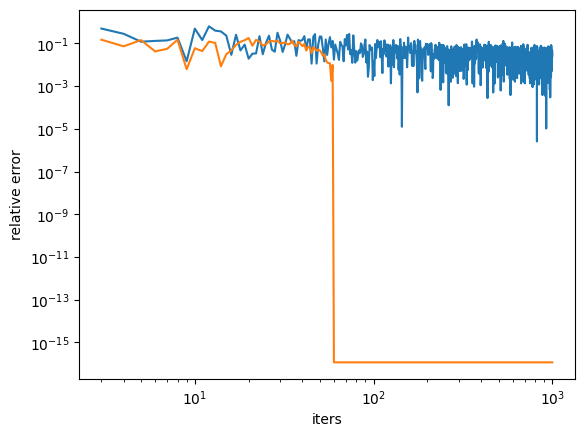

In [31]:
x_Hutch, y_Hutch, x_ImprHutch, y_ImprHutch = [], [], [], []
num_products = np.arange(3,1000)
x_Hutch = num_products
x_ImprHutch = num_products
N = 20
A = make_spd_matrix(N)
trace = np.trace(A)
for i in num_products:
    y_Hutch.append(np.abs(Hutchinson(A, iters=i, dist='Rademacher') - trace)/trace)
    y_ImprHutch.append(np.abs(improved_Hutch(A, i) - trace)/trace)

plt.xlabel('iters')
plt.ylabel('relative error')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_Hutch, y_Hutch)
plt.plot(x_ImprHutch, y_ImprHutch)

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

[1.    0.933 0.896 0.871 0.851 0.836 0.823 0.812 0.803 0.794]


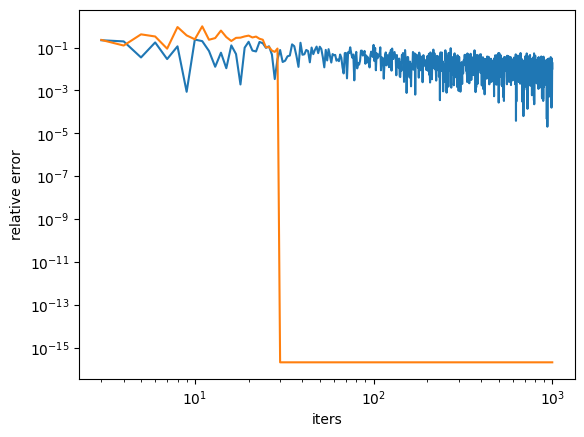

In [32]:
a = 0.1 # slowly decaying eigenvals
N = 10
eig_vals = np.array([i**(-a) for i in range(1,N+1)])
print(eig_vals)
V = make_spd_matrix(N)
A = V @ np.diag(eig_vals) @ np.linalg.inv(V)
x_Hutch, y_Hutch, x_ImprHutch, y_ImprHutch = [], [], [], []
num_products = np.arange(3,1000)
x_Hutch = x_ImprHutch = num_products
trace = np.trace(A)
for i in num_products:
    y_Hutch.append(np.abs(Hutchinson(A, iters=i, dist='Normal') - trace)/trace)
    y_ImprHutch.append(np.abs(improved_Hutch(A, i) - trace)/trace)

plt.xlabel('iters')
plt.ylabel('relative error')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_Hutch, y_Hutch)
plt.plot(x_ImprHutch, y_ImprHutch)

[1.    0.25  0.111 0.062 0.04  0.028 0.02  0.016 0.012 0.01 ]


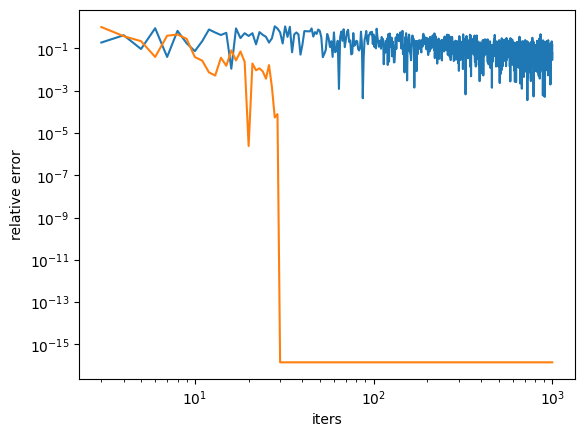

In [33]:
a = 2 # fast decaying eigenvals
N = 10
eig_vals = np.array([i**(-a) for i in range(1,N+1)])
print(eig_vals)
V = make_spd_matrix(N)
A = V @ np.diag(eig_vals) @ np.linalg.inv(V)
x_Hutch, y_Hutch, x_ImprHutch, y_ImprHutch = [], [], [], []
num_products = np.arange(3,1000)
x_Hutch = x_ImprHutch = num_products
trace = np.trace(A)
for i in num_products:
    y_Hutch.append(np.abs(Hutchinson(A, iters=i, dist='Normal') - trace)/trace)
    y_ImprHutch.append(np.abs(improved_Hutch(A, i) - trace)/trace)

plt.xlabel('iters')
plt.ylabel('relative error')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_Hutch, y_Hutch)
plt.plot(x_ImprHutch, y_ImprHutch)

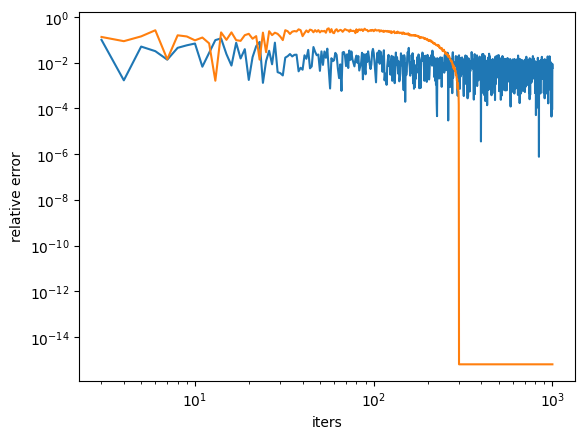

In [34]:
"""
if A is [100,100] and sparce
"""
N = 100
A = make_sparse_spd_matrix(N)
x_Hutch, y_Hutch, x_ImprHutch, y_ImprHutch = [], [], [], []
num_products = np.arange(3,1000)
x_Hutch = x_ImprHutch = num_products
trace = np.trace(A)
for i in num_products:
    y_Hutch.append(np.abs(Hutchinson(A, iters=i, dist='Normal') - trace)/trace)
    y_ImprHutch.append(np.abs(improved_Hutch(A, i) - trace)/trace)

plt.xlabel('iters')
plt.ylabel('relative error')
plt.yscale('log')
plt.xscale('log')
plt.plot(x_Hutch, y_Hutch)
plt.plot(x_ImprHutch, y_ImprHutch)

3. Summarize your observations.

Impoved Hutchinson algorithm estimates tr(A) as sum of traces of low-rank approximation to A and second part being estimated with classical iterative Hutchinson algo. With growing number of itereations the trace of low-rank does not change but the trace of second part does. The more iters the better approximation of trace of second part.

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



In [35]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

def ToPILImage(tensor):
  return transforms.ToPILImage()(tensor)

In [36]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
    def get_function_output(self, inp, index=0):
        if index == 0:
            inp = inp[:,:,None,None]
        return self.forward[index](inp)

In [37]:
def fooling_rate(true_outputs, injured):
  N = true_outputs.shape[0]
  rate = np.zeros(N)
  rate[injured != true_outputs] = 1
  return np.mean(rate)

def power_method(x, mat_vec_J, q):
    def phi(r, x):
        assert r >= 1
        if r == np.Infinity:
            r = 1
        else:
            r = r / (r-1)
        return np.sign(x)*np.power(np.abs(x), r-1)

    p = np.Infinity
    x = x.cpu().detach().numpy()
    x = x.flatten()[:, None]
    x = x /np.linalg.norm(x, ord = p)
    s = np.linalg.norm((mat_vec_J @ x).ravel(), ord = q)
    prev_sing = 0
    while(prev_sing!=s):
        Sx = phi(p, mat_vec_J.T @ phi(q ,mat_vec_J @ x))
        x = Sx / np.linalg.norm(Sx, ord = p)
        s = np.linalg.norm((mat_vec_J @ x).ravel(), ord = q)
        prev_sing = s
    return x, s


def stack(grads):
    stacked = torch.zeros(size=(grads.shape[0], grads[0].flatten().shape[0]))
    for i in range(grads.shape[0]):
        stacked[i,:] = grads[i,:,:,:].flatten()
    return stacked


def Stochastic_Power_Method(model, test_imgs, q = 10):
    input = torch.autograd.Variable(test_imgs, requires_grad=True)
    f_x = model.forward(input)
    J = torch.autograd.grad(f_x, input, torch.ones_like(f_x))[0]
    stacked_J = stack(J).detach().numpy()
    i = np.random.randint(0, 16)
    x, s = power_method(input[i,:,:,:], stacked_J, q)
    return x, s

In [38]:
def ToPILImage(tensor):
  return transforms.ToPILImage()(tensor)

def ConvertTensorsToOne(tensor, nrow=None):
  if nrow is None:
    nrow = int(tensor.size(0) ** 0.5)
  return vutils.make_grid(tensor, padding=2, normalize=True, nrow=nrow).cpu()

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [39]:
file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")
seed = 0
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    
model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

Files already downloaded and verified


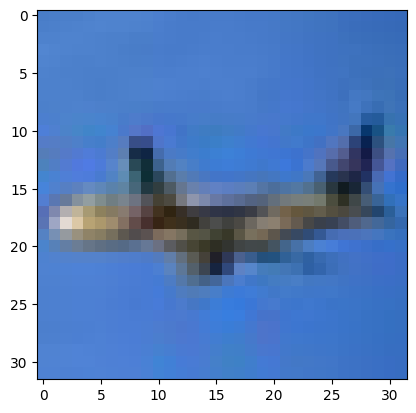

In [40]:
dataset = CIFAR10(root = '/home/mark/Desktop/NLA/HW2', train=False, download=True, transform=transforms.ToTensor())
batch_size = 64
TestDataLoader = DL(dataset, batch_size=batch_size, num_workers=4, shuffle=True)

"""
Lets feed some random Batch of ims to the network.
Last hiddel layer of NN is fixed: self.fc3 = nn.Linear(256, 10), so the output of the NN is used to compute Jacobians.
"""
images, labels = next(iter(TestDataLoader))
sing_vector, sing_value = Stochastic_Power_Method(model, images.to(device))

plt.imshow(ToPILImage(images[0,:,:,:])) # Just vizualize some random image from batch 

In [41]:
"""
         Lets compute Fooling Rate without any perturbations based on our simple classifier
"""
outputs = []
true_labels = []
for images, labels in TestDataLoader:
    outputs.append(torch.argmax(model.forward((images).to(device)) , axis=1))
    true_labels.append(labels)

FoolingRate = 0
for i in range(len(outputs)):
    FoolingRate += fooling_rate(true_labels[i], outputs[i].to('cpu'))
print('Fooling rate without perturbation: ', FoolingRate / len(outputs))

Fooling rate without perturbation:  0.4128184713375796


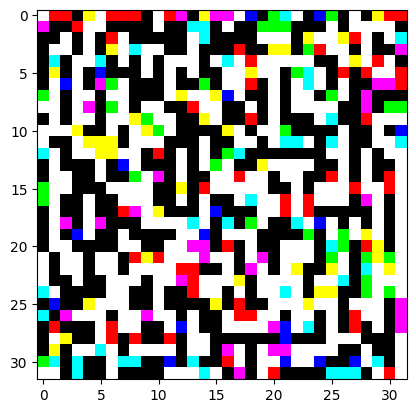

In [42]:
"""
Now lets visualize the computed perturbation
"""
perturbation = torch.Tensor(sing_vector.reshape((3, 32, 32)))
plt.imshow(ToPILImage(perturbation))

In [43]:
outputs = []
true_labels = []
for images, labels in TestDataLoader:
    outputs.append(torch.argmax(model.forward((images+perturbation).to(device)) , axis=1))
    true_labels.append(labels)

FoolingRate = 0
for i in range(len(outputs)):
    FoolingRate += fooling_rate(true_labels[i], outputs[i].to('cpu'))
print('Fooling rate after perturbation: ', FoolingRate / len(outputs))

Fooling rate after perturbation:  0.8798765923566879


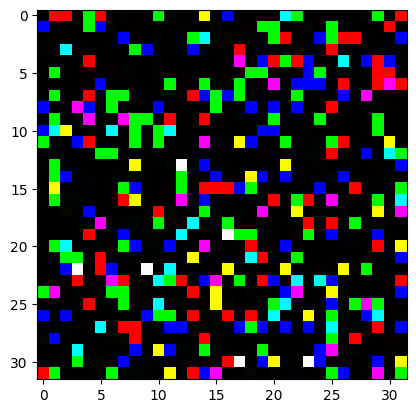

In [44]:
"""
Lets now sparcify the perturbation so it has K = 0.25*N non-zero elements
"""
K = 2000
perturbation = torch.nn.functional.dropout(perturbation, p = 0.75)
plt.imshow(ToPILImage(perturbation))

In [45]:
outputs = []
true_labels = []
for images, labels in TestDataLoader:
    outputs.append(torch.argmax(model.forward((images+perturbation).to(device)) , axis=1))
    true_labels.append(labels)

FoolingRate = 0
for i in range(len(outputs)):
    FoolingRate += fooling_rate(true_labels[i], outputs[i].to('cpu'))
print('Fooling rate after perturbation with 75% dropout chance : ', FoolingRate / len(outputs))

Fooling rate after perturbation with 75% dropout chance :  0.8884355095541401


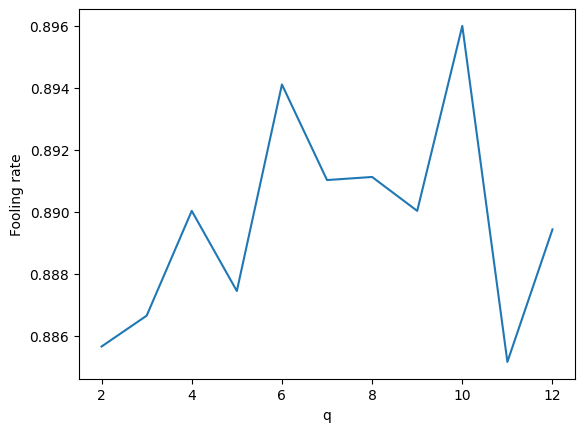

In [46]:
"""
Now, lets compare the influence of different parametrs on fooling rate
"""
q = [2,3,4,5,6,7,8,9,10,11,12]
sing_values = []
sing_vectors = []
rates = []
images, labels = next(iter(TestDataLoader))

for q_i in q:
    sing_vector, sing_value = Stochastic_Power_Method(model, images.to(device), q_i)
    sing_values.append(sing_value)
    sing_vectors.append(sing_vector)

    perturbation = torch.Tensor(sing_vector.reshape((3, 32, 32)))

    outputs = []
    true_labels = []
    for images, labels in TestDataLoader:
        outputs.append(torch.argmax(model.forward((images+perturbation).to(device)) , axis=1))
        true_labels.append(labels)

    FoolingRate = 0
    for i in range(len(outputs)):
        FoolingRate += fooling_rate(true_labels[i], outputs[i].to('cpu')) / len(outputs)
    rates.append(FoolingRate)

plt.xlabel('q')
plt.ylabel('Fooling rate')
plt.plot(q, rates)

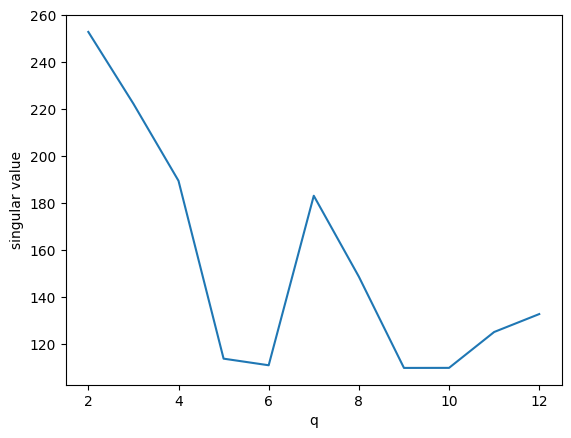

In [47]:
plt.xlabel('q')
plt.ylabel('singular value')
plt.plot(q, sing_values)

In the experiment we can conclude that adversarial attack matrix obtained from the last NN layer and optimized with infinum + some norm guarantees the fooling rate of 89%. Which totally brakes the classifier. I experimented with other layers, but the best result is with the last one.
As we are maximazing the difference between clean image forward propagation and perturbated image (to brake the classifier), for really small perturbation we can complute Jacobian of the difference. To increase the difference, one needs to increase the q-norm of Jacobian by perturbation product. Basically, to increase the p-norm of perturbation itself, and this can be achieved by power method, which find the largest eigen value, so the perturbation, which maximizes the Jacobian by perturb product, so the difference between images itself.

# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N-1}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N-1}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g) + \alpha_1vec(u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [4]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"|

zsh:1: parse error near `|'


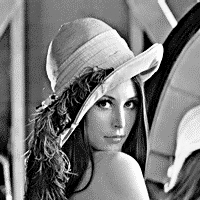

In [5]:
" Change absolute path to upload an image"
orig_image = ImageOps.grayscale(Image.open("/home/mark/Desktop/NLA/HW2/lena.png"))
orig_image

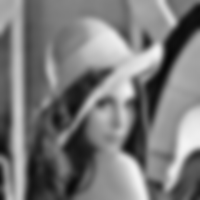

In [6]:
blured_img = orig_image.filter(GaussianBlur(radius = 3))
blured_img

In [107]:
def conjGrad(f, u, G, kernel, a1, tol=1e-3, N = 5):
    aI = a1*np.ones((3,3))

    x_prev = f
    x = x_prev.copy()
    rhs = fast_mat_vec(G, kernel, Transpose=True) + a1*u
    r_prev = np.random.normal(size=f.ravel().shape[0])
    p_prev = r_prev

    for i in range(N):
        lhs = fast_mat_vec(fast_mat_vec(x.reshape(G.shape[0], G.shape[1]), kernel), kernel, Transpose=True) + fast_mat_vec(x.reshape(G.shape[0], G.shape[1]), aI)
        r = rhs - lhs
        p = r.copy()
        lhs_p = fast_mat_vec(fast_mat_vec(p, kernel), kernel, Transpose=True) + fast_mat_vec(p, aI)

        r = r.ravel()
        p = p.ravel()

        lhs_p = lhs_p.ravel()
        alpha = (r @ r) / (lhs_p @ p)
        betta = (r @ r)/(r_prev @ r_prev)

        x = x_prev.ravel() + alpha * p
        r = r_prev - alpha * lhs_p
        p = r + betta * p_prev

        p_prev = p
        r_prev = r
        x_prev = x
        
    return x 

def some_solver(a1, a2, f, U):
    n = f.shape[0]
    u = cvx.Variable(shape = n)
    cost = a1*cvx.sum_squares(f - u) + a2*TV_norm(U)
    prob = cvx.Problem(cvx.Minimize(cost))
    prob.solve()
    return u.value

def TV_norm(img):
    Gx = Scharr(img, cv2.CV_64F, 1, 0)
    Gy = Scharr(img, cv2.CV_64F, 0, 1)
    return np.sum(np.sqrt(Gx**2 + Gy**2))


def problem_solver(img, kernel, a1, a2, N = 1):
    U = img.copy()
    f = img
    G = img
    for i in range(N):
        f = conjGrad(f, U, G, kernel,a1, tol=1e-3, N = 5)
        U = some_solver(a1, a2, f, U)
        U = U.reshape((img.shape[0], img.shape[1]))
        f = f.reshape(img.shape[0], img.shape[1])
        print('iter:' + str(i) + ' is done')
    return f, U

iter:0 is done
iter:1 is done
iter:2 is done
iter:3 is done
iter:4 is done
iter:5 is done
iter:6 is done
iter:7 is done
iter:8 is done
iter:9 is done
iter:10 is done
iter:11 is done
iter:12 is done
iter:13 is done
iter:14 is done


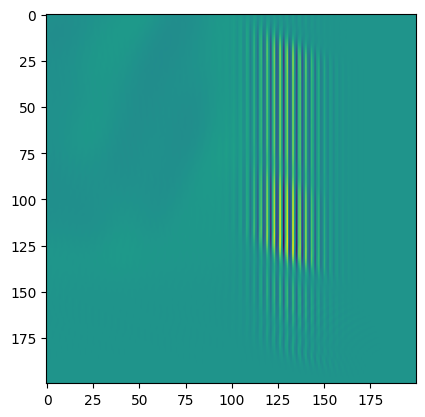

In [108]:
img = np.array(blured_img)
a1 = 0.01
a2 = 1
Kernel = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])
F, U = problem_solver(img, Kernel, a1, a2, N=15)
plt.imshow(F)

In [101]:
# def fast_mat_vec(img, kernel, Transpose = False):
#     return scipy.signal.convolve2d(img, kernel, "same")

def fast_mat_vec(img, kernel, Transpose = False):
    N = img.shape[0]
    M = img.shape[1]
    n = kernel.shape[0]
    m = kernel.shape[1]

    columns = []

    if not Transpose:
        for i in range(n):
            row = Kernel[i,:]
            row = np.pad(row, pad_width=(0,M-m))
            col = np.zeros(shape=M-2)
            col[0] = row [0]
            col = np.hstack((col, np.flip(row[1:])))
            columns.append(col)

        C = np.zeros(shape=(columns[0].shape[0], columns[0].shape[0]))
        C[:,0] = columns[0]
        C[:,-2] = columns[-2]
        C[:,-1] = columns[-1]

    else:
        for i in range(n):
            col = Kernel[i,:]
            col = np.pad(col, pad_width=(0,M-m))
            row = np.zeros(shape=M-2)
            row[0] = col[0]
            col = np.hstack((col, np.flip(row[1:])))
            columns.append(col)

        C = np.zeros(shape=(columns[0].shape[0], columns[0].shape[0]))
        C[:,0] = columns[0]
        C[:,1] = columns[1]
        C[:,2] = columns[2]

    img = np.pad(img, pad_width= ((0,C.shape[0]-N),(0,C.shape[0]-M)))
    result = np.real(ifft(np.multiply(fft(img), fft(C))))
    return result[:200,:200]    

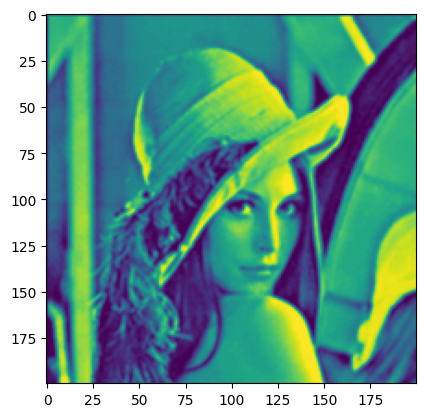

In [102]:
Kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
test_img = np.random.rand(6,6)
orig_image = np.array(orig_image)
res =  fast_mat_vec(orig_image, Kernel, Transpose=True)[:200,:200]
plt.imshow(res)


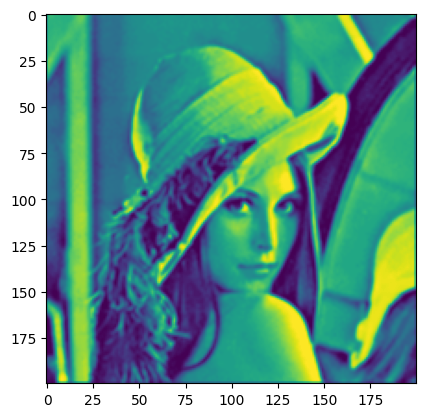

In [116]:
from scipy import signal
lib_result = signal.convolve2d(orig_image, Kernel, "same")
plt.imshow(lib_result)

Unfortunatelly, i did not manage to refine blured image, but managed to make fast matrix by vector multiplication for convolution